In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import csv

In [2]:
data= pd.read_csv('train.csv')

In [7]:
mapping_data1={
'KaggleRama':1,
   'KaggleMart':0
}
mapping_data2={
'Kaggle Mug':2,
   'Kaggle Hat':1,
    'Kaggle Sticker':0
}


#data['store'].map(mapping_data1)
#data['product'].map(mapping_data2)

In [8]:
data_label_en=data[['store',
               'product']].values
Le=LabelEncoder()
for i in range(len(data_label_en[0])):
    data_label_en[:,i]=Le.fit_transform(data_label_en[:,i])

In [9]:
x=np.array(data_label_en)

In [10]:
print(x)

[[0 1]
 [0 0]
 [0 2]
 ...
 [1 1]
 [1 0]
 [1 2]]


In [11]:
y=np.array(data['num_sold'])

In [12]:
l_reg=linear_model.LinearRegression()
l_reg.fit(x,y)

LinearRegression()

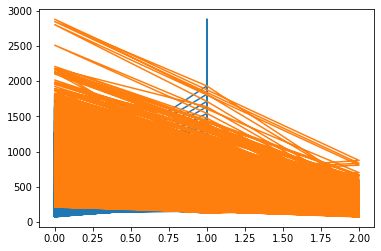

In [13]:
plt.plot(x,y)

In [15]:
data_test= pd.read_csv('test.csv')

In [16]:
data_label_en=data_test[['store',
               'product']].values
Le=LabelEncoder()
for i in range(len(data_label_en[0])):
    data_label_en[:,i]=Le.fit_transform(data_label_en[:,i])

In [17]:
x_test=np.array(data_label_en)
print(x_test)

[[0 1]
 [0 0]
 [0 2]
 ...
 [1 1]
 [1 0]
 [1 2]]


In [19]:
data_result=pd.read_csv('sample_submission.csv')
y=np.array(data_result['num_sold'])
print(y)

[100 100 100 ... 100 100 100]


In [20]:
pred=l_reg.predict(x_test)

In [21]:
print(pred)

[282.55897787 507.28285421  57.83510153 ... 492.50817553 717.23205187
 267.78429919]


In [22]:
y_id=np.array(data_result['row_id'])

In [23]:
final_data={'row_id':y_id,'num_sold':pred}
submis=pd.DataFrame(data=final_data)

In [24]:
submis.to_csv('submission.csv' , index=False)